In [ ]:
import requests
from requests import Response
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
response = requests.get(url)
print(response.text)

In [4]:
from bs4 import BeautifulSoup
from pprint import pprint
soup = BeautifulSoup(response.text, 'html.parser')

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table', {'title': '牌告匯率'})

# 取得所有幣別和現金匯率資料
currency_rows = rate_table.tbody.find_all('tr') 

rates:list[dict] = []

for row in currency_rows:
    currency_dict = {}
    # 取行中的幣別資料
    currency = row.find("td", attrs={"data-table": "幣別"}).find("div", class_="visible-phone").text.strip()
    currency_dict["幣別"] = currency

    # 取得即期買入匯率
    currency_get = row.find("td", attrs={"data-table": "本行現金買入"}).text.strip()
    currency_dict["現金買入"] = currency_get

    # 取得即期賣出匯率
    currency_send = row.find("td", attrs={"data-table": "本行現金賣出"}).text.strip()
    currency_dict["現金賣出"] = currency_send

    #print(f"幣別: {currency}, 現金買入: {currency_get}, 現金賣出: {currency_send}")
    #print("-" * 60)
    rates.append(currency_dict)

pprint(rates)
    

[{'幣別': '美金 (USD)', '現金買入': '32.345', '現金賣出': '33.015'},
 {'幣別': '港幣 (HKD)', '現金買入': '4.058', '現金賣出': '4.262'},
 {'幣別': '英鎊 (GBP)', '現金買入': '40.23', '現金賣出': '42.35'},
 {'幣別': '澳幣 (AUD)', '現金買入': '20.49', '現金賣出': '21.27'},
 {'幣別': '加拿大幣 (CAD)', '現金買入': '22.57', '現金賣出': '23.48'},
 {'幣別': '新加坡幣 (SGD)', '現金買入': '23.92', '現金賣出': '24.83'},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': '35.66', '現金賣出': '36.86'},
 {'幣別': '日圓 (JPY)', '現金買入': '0.2101', '現金賣出': '0.2229'},
 {'幣別': '南非幣 (ZAR)', '現金買入': '-', '現金賣出': '-'},
 {'幣別': '瑞典幣 (SEK)', '現金買入': '-', '現金賣出': '-'},
 {'幣別': '紐元 (NZD)', '現金買入': '18.36', '現金賣出': '19.21'},
 {'幣別': '泰幣 (THB)', '現金買入': '0.8474', '現金賣出': '1.0374'},
 {'幣別': '菲國比索 (PHP)', '現金買入': '0.5', '現金賣出': '0.632'},
 {'幣別': '印尼幣 (IDR)', '現金買入': '0.00168', '現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '現金買入': '33.48', '現金賣出': '34.82'},
 {'幣別': '韓元 (KRW)', '現金買入': '0.0211', '現金賣出': '0.025'},
 {'幣別': '越南盾 (VND)', '現金買入': '0.00104', '現金賣出': '0.00145'},
 {'幣別': '馬來幣 (MYR)', '現金買入': '6.387', '現金賣出': '7.912'},


In [8]:
import pandas as pd
df = pd.DataFrame(rates)
print(df.T)


            0         1         2         3           4           5   \
幣別    美金 (USD)  港幣 (HKD)  英鎊 (GBP)  澳幣 (AUD)  加拿大幣 (CAD)  新加坡幣 (SGD)   
現金買入    32.345     4.058     40.23     20.49       22.57       23.92   
現金賣出    33.015     4.262     42.35     21.27       23.48       24.83   

              6         7          8          9         10        11  \
幣別    瑞士法郎 (CHF)  日圓 (JPY)  南非幣 (ZAR)  瑞典幣 (SEK)  紐元 (NZD)  泰幣 (THB)   
現金買入       35.66    0.2101          -          -     18.36    0.8474   
現金賣出       36.86    0.2229          -          -     19.21    1.0374   

              12         13        14        15         16         17  \
幣別    菲國比索 (PHP)  印尼幣 (IDR)  歐元 (EUR)  韓元 (KRW)  越南盾 (VND)  馬來幣 (MYR)   
現金買入         0.5    0.00168     33.48    0.0211    0.00104      6.387   
現金賣出       0.632    0.00238     34.82     0.025    0.00145      7.912   

             18  
幣別    人民幣 (CNY)  
現金買入      4.421  
現金賣出      4.583  


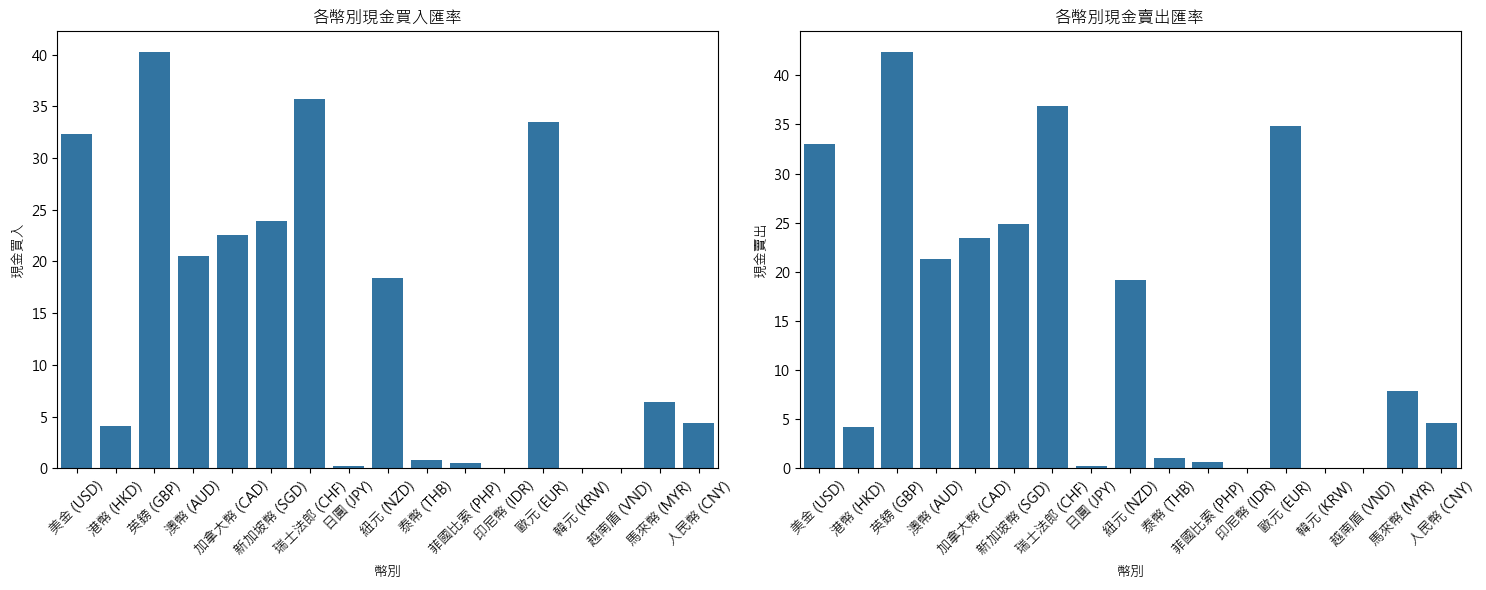

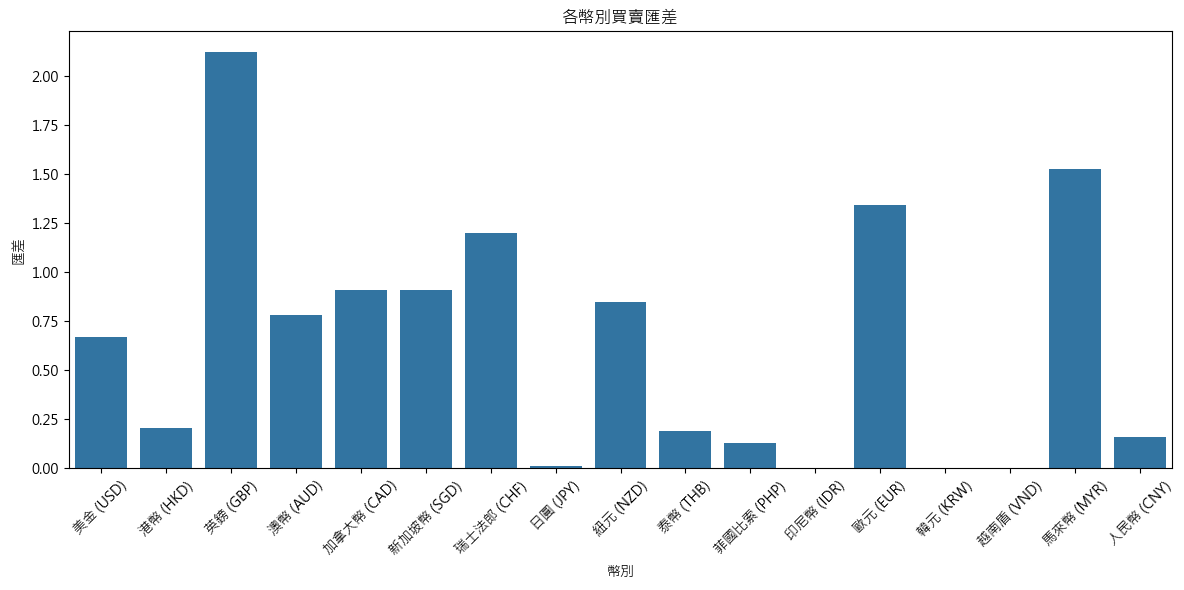


資料已儲存至 currency_rates.csv


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 設定中文字體，Windows 系統請使用以下設定
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

# 將 list of dictionaries 轉換為 DataFrame
df = pd.DataFrame(rates)

# 轉換匯率為數值型別，將 '-' 和空值替換為 NaN
df['現金買入'] = pd.to_numeric(df['現金買入'].replace(['-', ''], np.nan), errors='coerce')
df['現金賣出'] = pd.to_numeric(df['現金賣出'].replace(['-', ''], np.nan), errors='coerce')

# 移除沒有匯率的幣別
df = df.dropna()

# 建立圖表
plt.figure(figsize=(15, 6))

# 繪製條形圖
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='幣別', y='現金買入')
plt.title('各幣別現金買入匯率')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='幣別', y='現金賣出')
plt.title('各幣別現金賣出匯率')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 匯差分析
plt.figure(figsize=(12, 6))
df['匯差'] = df['現金賣出'] - df['現金買入']
sns.barplot(data=df, x='幣別', y='匯差')
plt.title('各幣別買賣匯差')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 存檔
df.to_csv('currency_rates.csv', encoding='utf-8-sig', index=False)
print("\n資料已儲存至 currency_rates.csv")

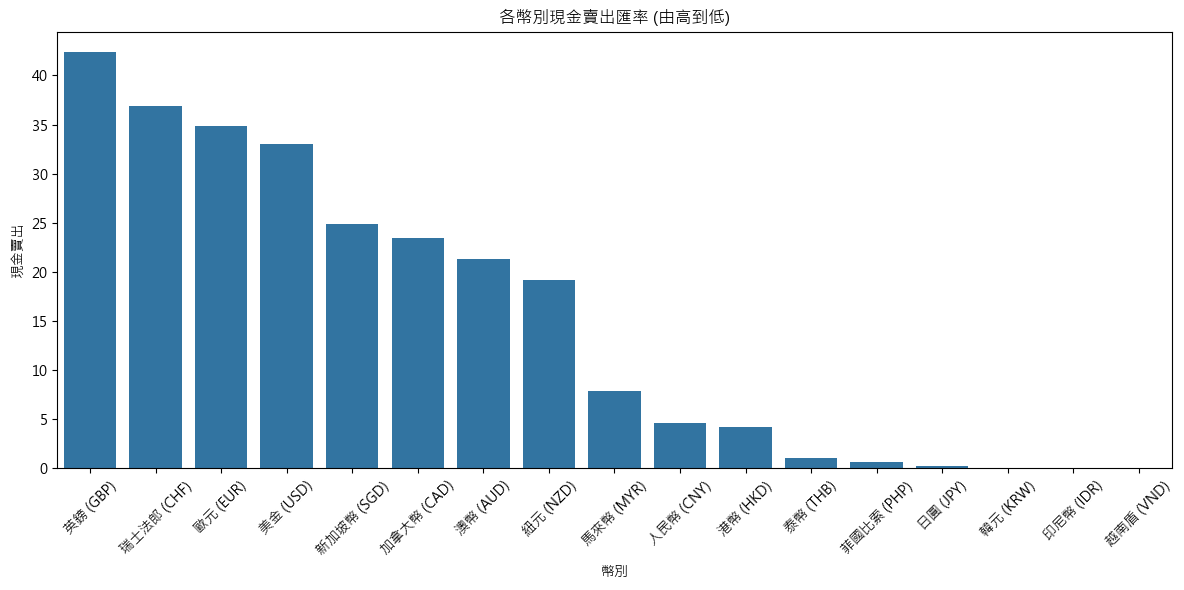

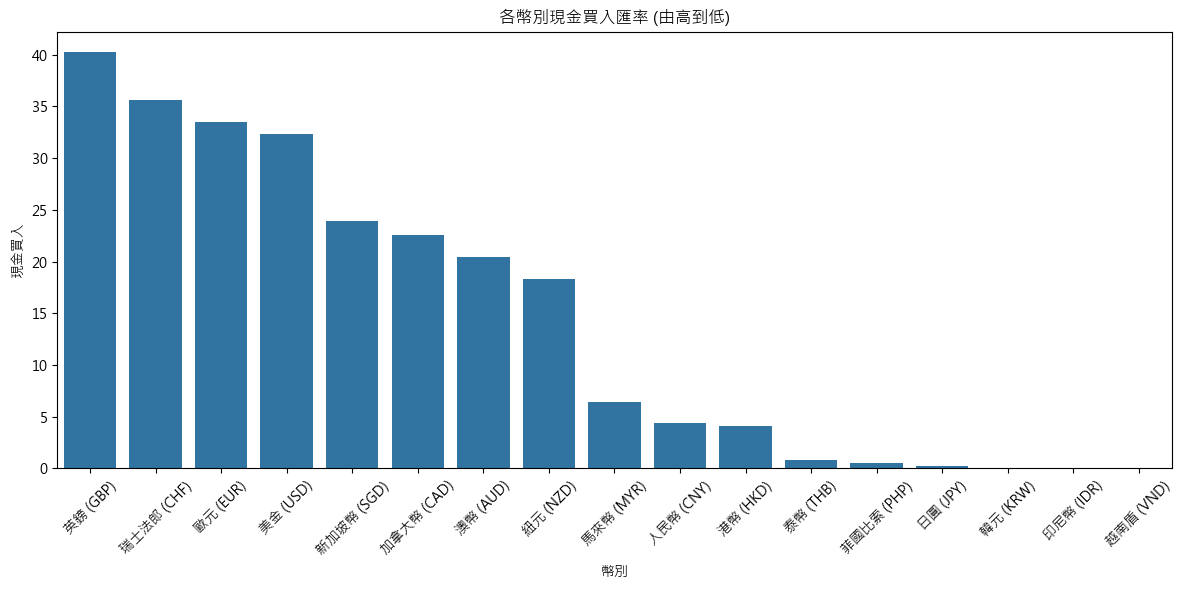

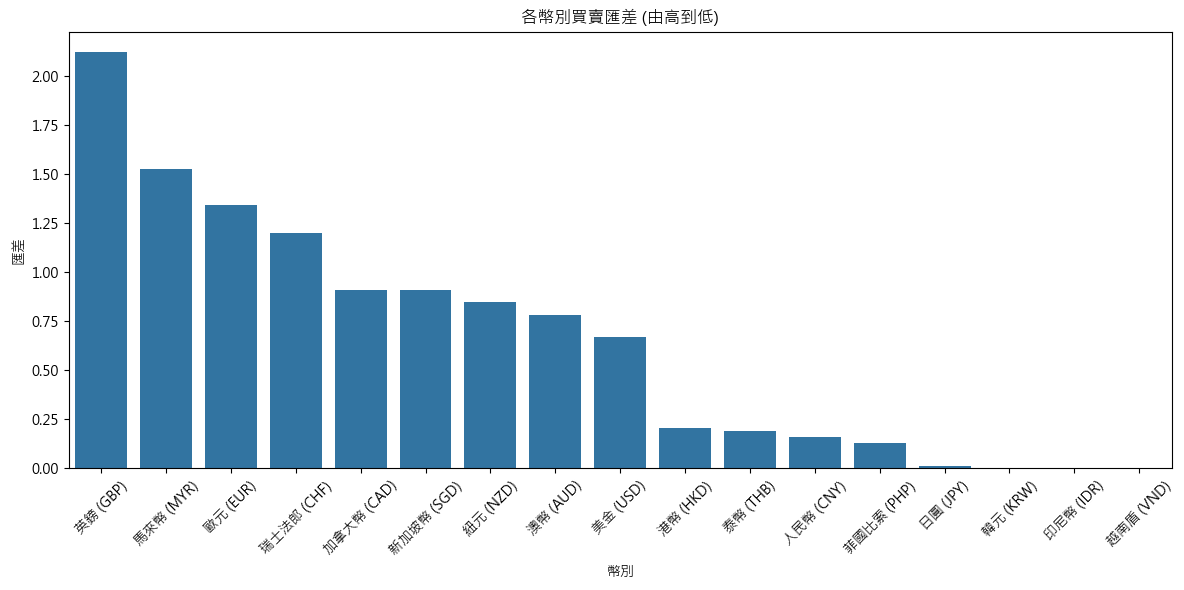


依現金賣出排序：
--------------------------------------------------
        幣別     現金賣出
  英鎊 (GBP) 42.35000
瑞士法郎 (CHF) 36.86000
  歐元 (EUR) 34.82000
  美金 (USD) 33.01500
新加坡幣 (SGD) 24.83000
加拿大幣 (CAD) 23.48000
  澳幣 (AUD) 21.27000
  紐元 (NZD) 19.21000
 馬來幣 (MYR)  7.91200
 人民幣 (CNY)  4.58300
  港幣 (HKD)  4.26200
  泰幣 (THB)  1.03740
菲國比索 (PHP)  0.63200
  日圓 (JPY)  0.22290
  韓元 (KRW)  0.02500
 印尼幣 (IDR)  0.00238
 越南盾 (VND)  0.00145

依現金買入排序：
--------------------------------------------------
        幣別     現金買入
  英鎊 (GBP) 40.23000
瑞士法郎 (CHF) 35.66000
  歐元 (EUR) 33.48000
  美金 (USD) 32.34500
新加坡幣 (SGD) 23.92000
加拿大幣 (CAD) 22.57000
  澳幣 (AUD) 20.49000
  紐元 (NZD) 18.36000
 馬來幣 (MYR)  6.38700
 人民幣 (CNY)  4.42100
  港幣 (HKD)  4.05800
  泰幣 (THB)  0.84740
菲國比索 (PHP)  0.50000
  日圓 (JPY)  0.21010
  韓元 (KRW)  0.02110
 印尼幣 (IDR)  0.00168
 越南盾 (VND)  0.00104

依匯差排序：
--------------------------------------------------
        幣別      匯差
  英鎊 (GBP) 2.12000
 馬來幣 (MYR) 1.52500
  歐元 (EUR) 1.34000
瑞士法郎 (CHF) 1.20000
加拿大幣

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 設定中文字體，Windows 系統請使用以下設定
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

# 將 list of dictionaries 轉換為 DataFrame
df = pd.DataFrame(rates)

# 轉換匯率為數值型別，將 '-' 和空值替換為 NaN
df['現金買入'] = pd.to_numeric(df['現金買入'].replace(['-', ''], np.nan), errors='coerce')
df['現金賣出'] = pd.to_numeric(df['現金賣出'].replace(['-', ''], np.nan), errors='coerce')

# 移除沒有匯率的幣別
df = df.dropna()

# 計算匯差
df['匯差'] = df['現金賣出'] - df['現金買入']

# 依現金賣出排序製圖
plt.figure(figsize=(12, 6))
df_sell = df.sort_values('現金賣出', ascending=False)
sns.barplot(data=df_sell, x='幣別', y='現金賣出')
plt.title('各幣別現金賣出匯率 (由高到低)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 依現金買入排序製圖
plt.figure(figsize=(12, 6))
df_buy = df.sort_values('現金買入', ascending=False)
sns.barplot(data=df_buy, x='幣別', y='現金買入')
plt.title('各幣別現金買入匯率 (由高到低)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 依匯差排序製圖
plt.figure(figsize=(12, 6))
df_spread = df.sort_values('匯差', ascending=False)
sns.barplot(data=df_spread, x='幣別', y='匯差')
plt.title('各幣別買賣匯差 (由高到低)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 顯示排序後的數據
print("\n依現金賣出排序：")
print("-" * 50)
print(df_sell[['幣別', '現金賣出']].to_string(index=False))

print("\n依現金買入排序：")
print("-" * 50)
print(df_buy[['幣別', '現金買入']].to_string(index=False))

print("\n依匯差排序：")
print("-" * 50)
print(df_spread[['幣別', '匯差']].to_string(index=False))

# 存檔
df_sell.to_csv('currency_rates_by_sell.csv', encoding='utf-8-sig', index=False)
df_buy.to_csv('currency_rates_by_buy.csv', encoding='utf-8-sig', index=False)
df_spread.to_csv('currency_rates_by_spread.csv', encoding='utf-8-sig', index=False)
print("\n資料已分別儲存至 currency_rates_by_sell.csv、currency_rates_by_buy.csv 和 currency_rates_by_spread.csv")

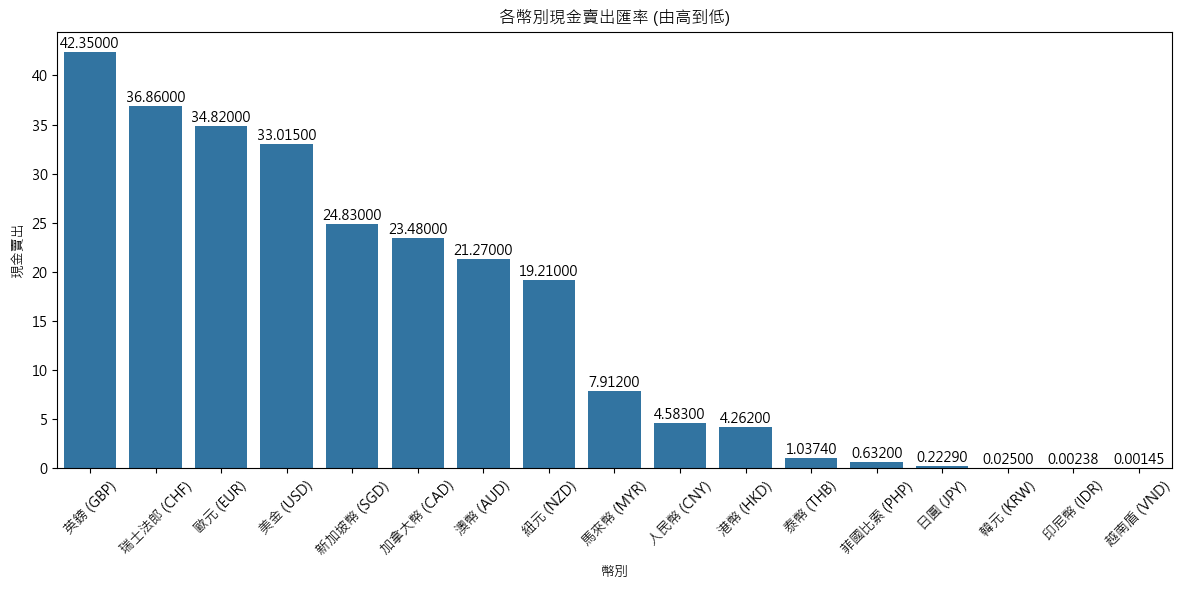

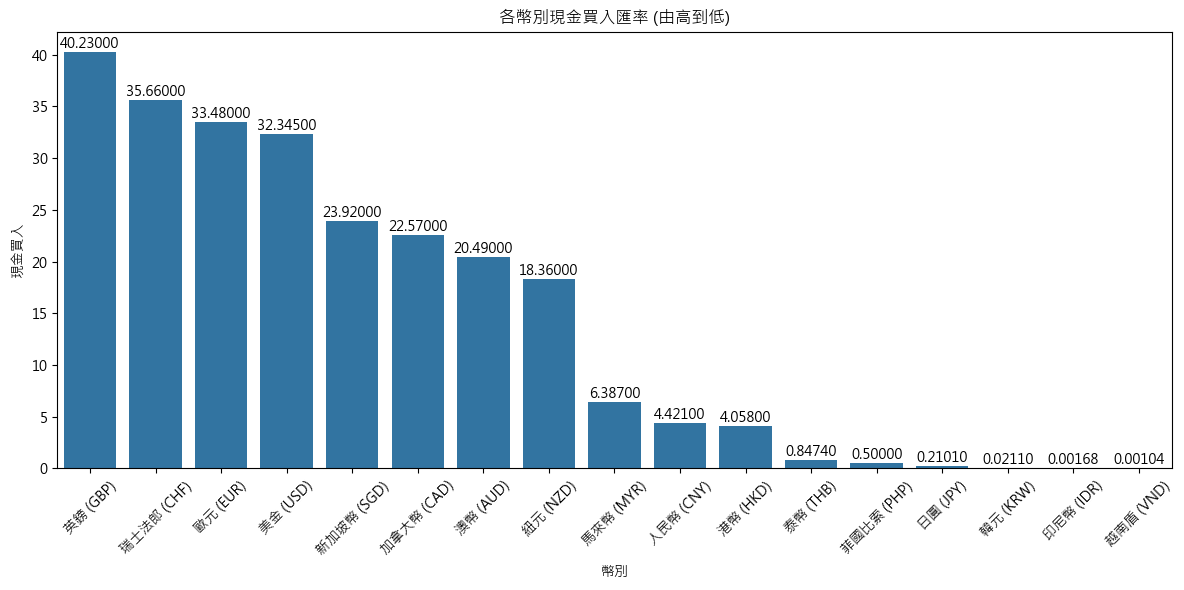

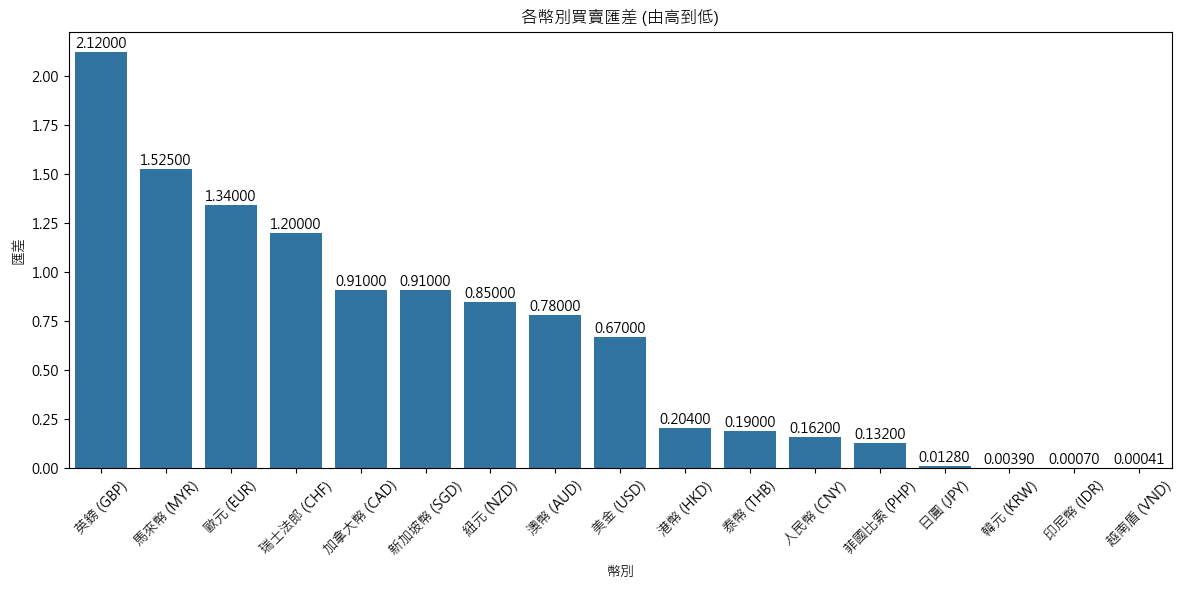

In [19]:
# ...existing code...

# 定義顯示數值的函數
def show_values_on_bars(axs):
    for p in axs.patches:
        axs.annotate(f'{p.get_height():.5f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

# 依現金賣出排序製圖
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(data=df_sell, x='幣別', y='現金賣出')
plt.title('各幣別現金賣出匯率 (由高到低)')
plt.xticks(rotation=45)
show_values_on_bars(ax1)
plt.tight_layout()
plt.show()

# 依現金買入排序製圖
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(data=df_buy, x='幣別', y='現金買入')
plt.title('各幣別現金買入匯率 (由高到低)')
plt.xticks(rotation=45)
show_values_on_bars(ax2)
plt.tight_layout()
plt.show()

# 依匯差排序製圖
plt.figure(figsize=(12, 6))
ax3 = sns.barplot(data=df_spread, x='幣別', y='匯差')
plt.title('各幣別買賣匯差 (由高到低)')
plt.xticks(rotation=45)
show_values_on_bars(ax3)
plt.tight_layout()
plt.show()

# ...existing code...

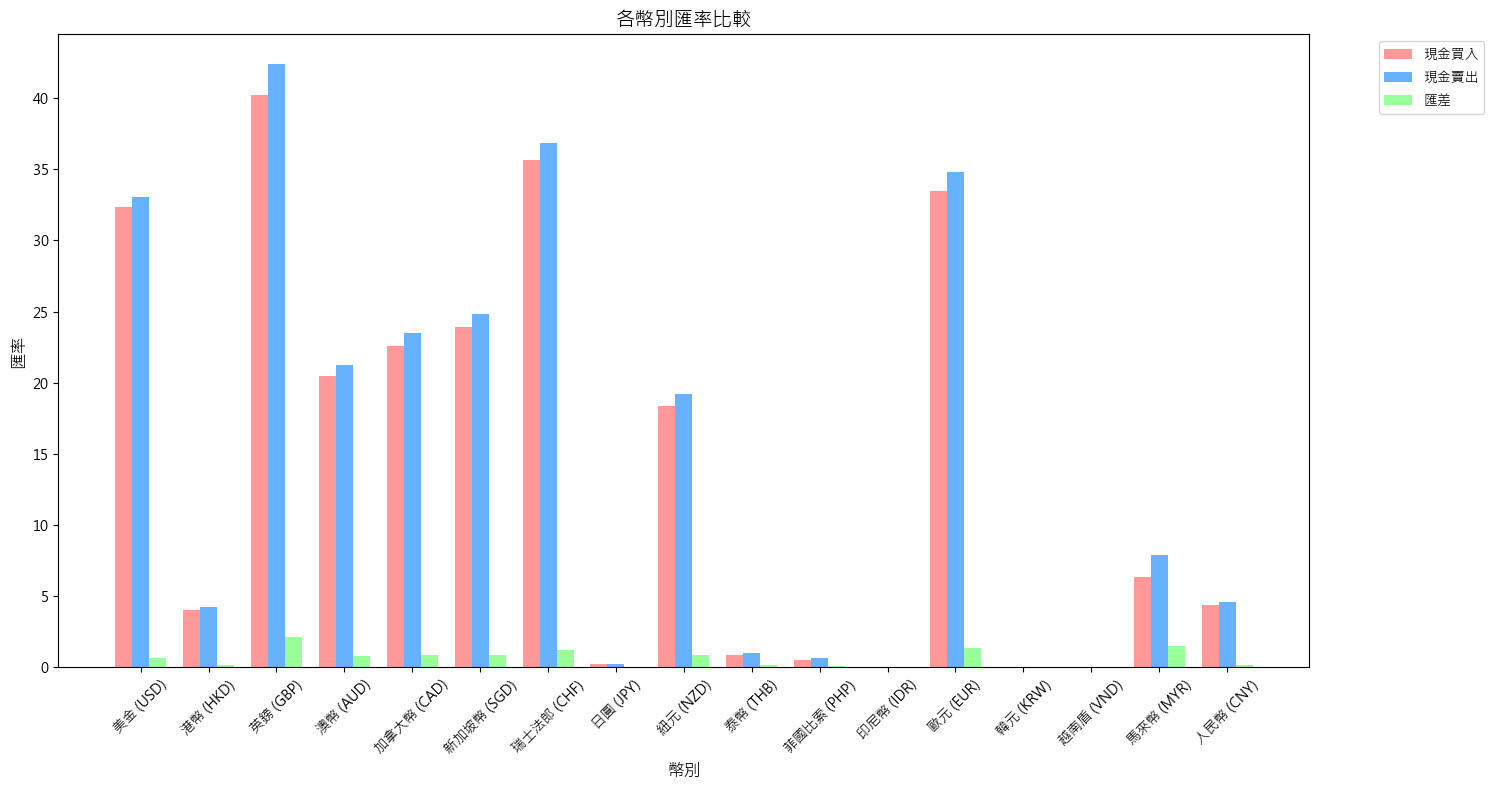


圖表已儲存至 currency_comparison.png


<Figure size 640x480 with 0 Axes>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 設定中文字體
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

# 創建圖表
plt.figure(figsize=(15, 8))

# 設定三組柱狀圖的位置
x = np.arange(len(df['幣別']))
width = 0.25  # 柱狀圖的寬度

# 繪製三組柱狀圖，分別錯開位置
plt.bar(x - width, df['現金買入'], width, label='現金買入', color='#FF9999')
plt.bar(x, df['現金賣出'], width, label='現金賣出', color='#66B2FF')
plt.bar(x + width, df['匯差'], width, label='匯差', color='#99FF99')

# 設定圖表標題和標籤
plt.title('各幣別匯率比較', fontsize=14)
plt.xlabel('幣別', fontsize=12)
plt.ylabel('匯率', fontsize=12)

# 設定 X 軸刻度標籤
plt.xticks(x, df['幣別'], rotation=45)

# 添加圖例
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 調整版面配置
plt.tight_layout()

# 顯示圖表
plt.show()

# 儲存圖表
plt.savefig('currency_comparison.png', dpi=300, bbox_inches='tight')
print("\n圖表已儲存至 currency_comparison.png")

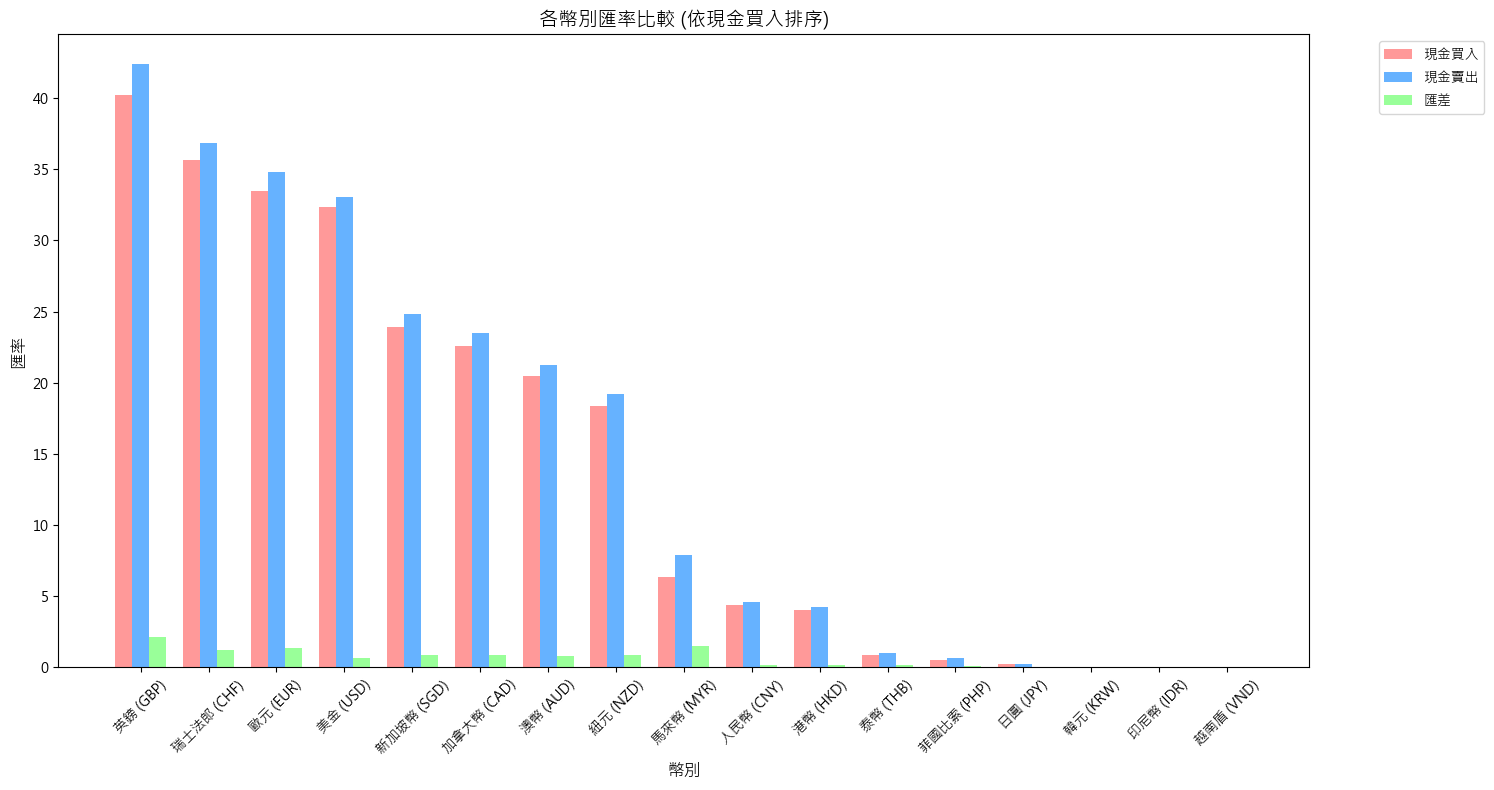


圖表已儲存至 currency_comparison_現金買入.png


<Figure size 640x480 with 0 Axes>

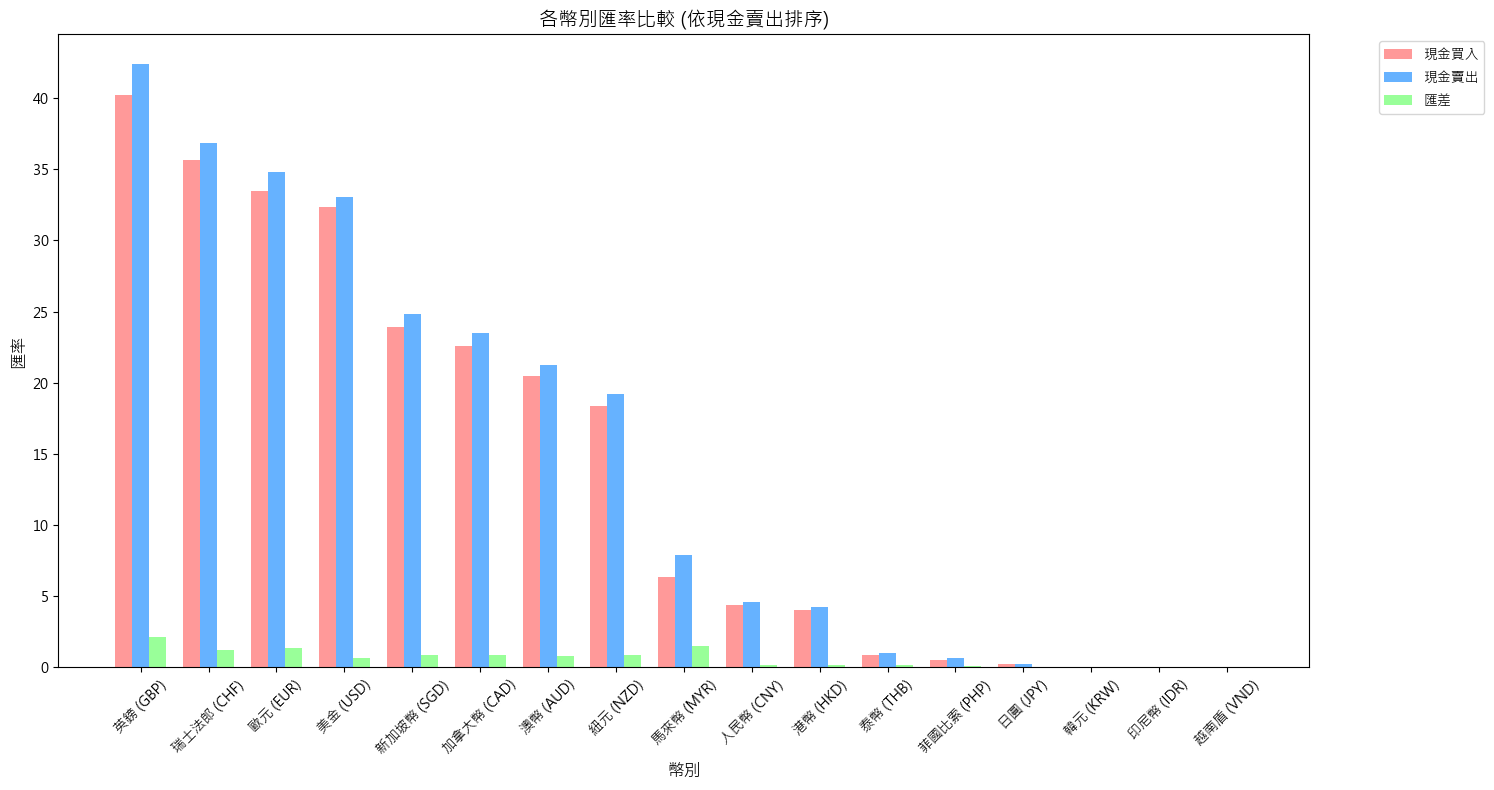


圖表已儲存至 currency_comparison_現金賣出.png


<Figure size 640x480 with 0 Axes>

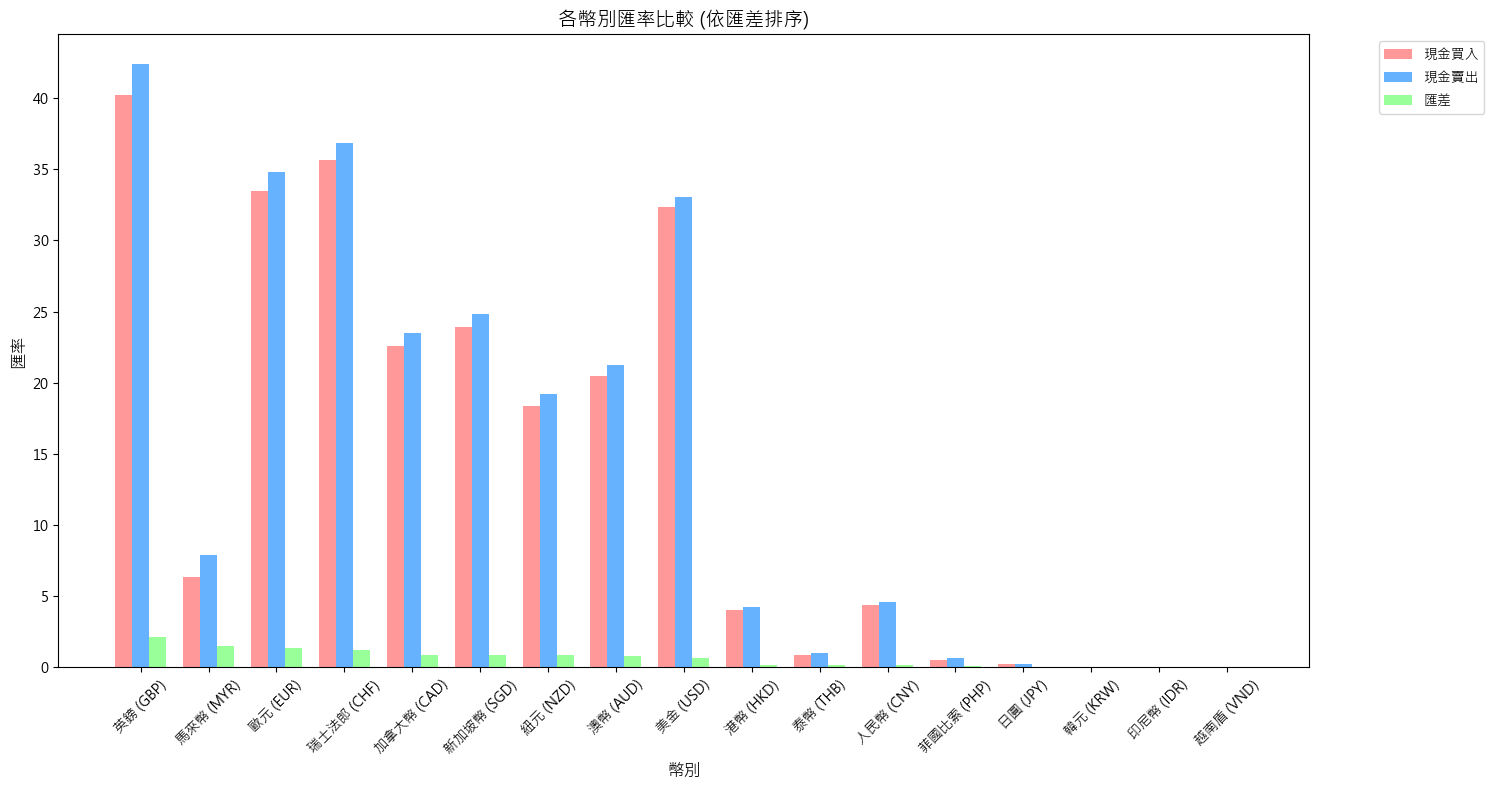


圖表已儲存至 currency_comparison_匯差.png


<Figure size 640x480 with 0 Axes>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 設定中文字體
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

# 定義繪圖函數
def plot_currency_comparison(data, sort_by, title):
    # 根據指定欄位排序
    df_sorted = data.sort_values(sort_by, ascending=False)
    
    # 創建圖表
    plt.figure(figsize=(15, 8))
    
    # 設定三組柱狀圖的位置
    x = np.arange(len(df_sorted['幣別']))
    width = 0.25
    
    # 繪製三組柱狀圖
    plt.bar(x - width, df_sorted['現金買入'], width, label='現金買入', color='#FF9999')
    plt.bar(x, df_sorted['現金賣出'], width, label='現金賣出', color='#66B2FF')
    plt.bar(x + width, df_sorted['匯差'], width, label='匯差', color='#99FF99')
    
    # 設定圖表標題和標籤
    plt.title(title, fontsize=14)
    plt.xlabel('幣別', fontsize=12)
    plt.ylabel('匯率', fontsize=12)
    
    # 設定 X 軸刻度標籤
    plt.xticks(x, df_sorted['幣別'], rotation=45)
    
    # 添加圖例
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 調整版面配置
    plt.tight_layout()
    
    # 顯示圖表
    plt.show()
    
    # 儲存圖表
    filename = f'currency_comparison_{sort_by}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"\n圖表已儲存至 {filename}")

# 繪製三張不同排序的圖表
plot_currency_comparison(df, '現金買入', '各幣別匯率比較 (依現金買入排序)')
plot_currency_comparison(df, '現金賣出', '各幣別匯率比較 (依現金賣出排序)')
plot_currency_comparison(df, '匯差', '各幣別匯率比較 (依匯差排序)')